In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# get a vector perpendicular to another vector
def perp(input_):
    # rotate by 90 degrees: x'=y, y'=x
    return np.array([input_[1], -input_[0]])

[0.70710678 0.70710678] [-0.70710678  0.70710678]


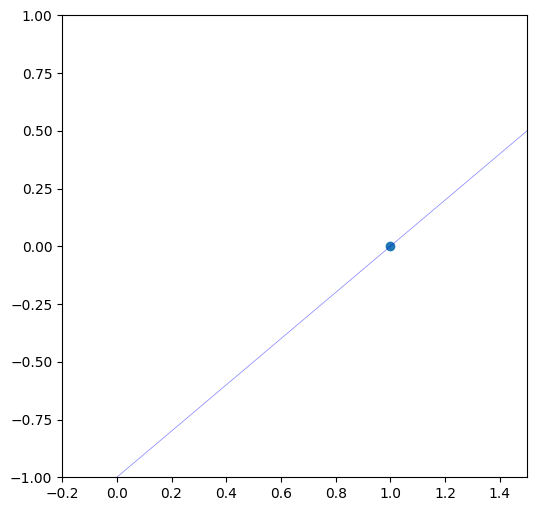

In [22]:
# define the plane
#normal = (-1, 0)
point = (1, 0)
#v = perp(normal) # a vector on the boundary
def v_by_angle(angle):
    theta = angle * np.pi / 180
    v = np.array([[np.cos(theta)], [np.sin(theta)]])
    return v, -1*perp(v)

v, n = v_by_angle(45)
v = v[..., 0]
n = n[..., 0]
print(v, n)


# drawing
o = point - 10*v
v *= 20

fig, ax = plt.subplots(figsize=[6, 6])
ex = o[0] + v[0]
ey = o[1] + v[1]
x = [o[0], ex]
y = [o[1], ey]
ax.plot(x, y, color='blue', linewidth=0.5, alpha=0.5)

ax.scatter(point[0], point[1])

ax.set_xlim(-0.2, 1.5)
ax.set_ylim(-1, 1)
plt.show()

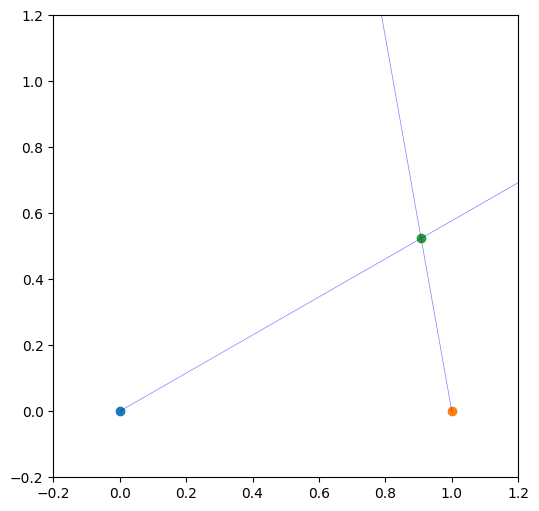

In [25]:
# line-line intersection
def intersect(p0, v0, p1, v1):
    # this function solves t1. you can right for t0 too
    # points and vectors are assumed to have the structure of [[x0, x1, ...], [y0, y1, ...]]
    dxy = p1 - p0
    t = (dxy[1]*v0[0] - dxy[0]*v0[1])/(v0[1]*v1[0] - v1[1]*v0[0])
    return p1 + t*v1

p0 = np.array([[0], [0]])
v0 = np.array([[np.cos(np.pi/6)], [np.sin(np.pi/6)]])

# boundary
p1 = np.array([[1], [0]])
v1, n1 = v_by_angle(100)

int_point = intersect(p0, v0, p1, v1)


# drawing the lines
fig, ax = plt.subplots(figsize=[6, 6])
ex = p0[0] + 10*v0[0]
ey = p0[1] + 10*v0[1]
x = [p0[0], ex]
y = [p0[1], ey]
ax.plot(x, y, color='blue', linewidth=0.5, alpha=0.5)


ex = p1[0] + 10*v1[0]
ey = p1[1] + 10*v1[1]
x = [p1[0], ex]
y = [p1[1], ey]
ax.plot(x, y, color='blue', linewidth=0.5, alpha=0.5)



# drawing the points
ax.scatter(p0[0], p0[1])
ax.scatter(p1[0], p1[1])
ax.scatter(int_point[0], int_point[1])

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
plt.show()




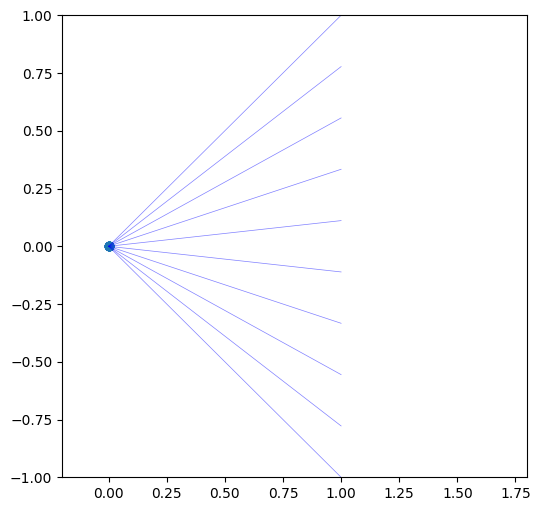

In [27]:
# this is a helper function to draw an array of lines
def draw_lines(fig, ax, points, vectors, length=10, double_sided=True, color='blue'):
    # points and vectors are assumed to have the structure of [[x0, x1, ...], [y0, y1, ...]]

    if double_sided:
        p = points - length*vectors
        v = vectors*2*length
    else:
        p = points
        v = vectors*length
    

    px, py = p[0], p[1]
    vx, vy = v[0], v[1]
    ex = px + vx
    ey = py + vy
    for i in range(len(px)):
        x = [px[i], ex[i]]
        y = [py[i], ey[i]]
        #print(x, y)
        ax.plot(x, y, color=color, linewidth=0.5, alpha=0.5)

    # drawing the sources
    ax.scatter(points[0], points[1])

    return fig, ax


fig, ax = plt.subplots(figsize=[6, 6])
fig, ax = draw_lines(fig, ax, np.zeros((2, 10)), np.stack([np.ones((10)), np.linspace(-1, 1, 10)], axis=0), 1.0, False)
ax.set_xlim(-0.2, 1.8)
ax.set_ylim(-1, 1)
plt.show()

(2, 100)


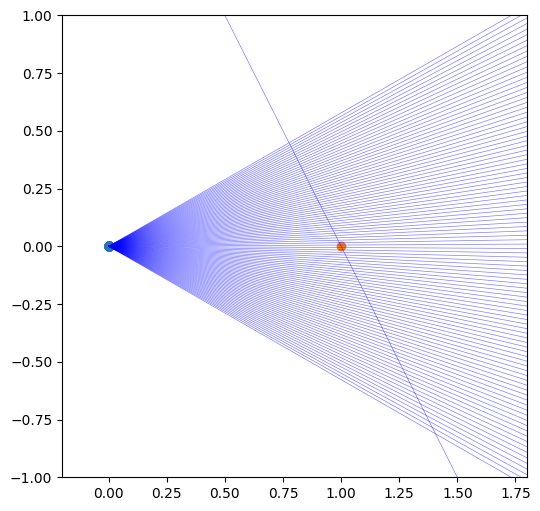

In [28]:
# now returning to rays and boundaries

######## rays ########
N = 100
srcs = np.zeros((2, N), np.float32)                   # position of sources

ray_angles = np.linspace(-30, 30, N) * np.pi/180
rays = np.stack([np.cos(ray_angles), np.sin(ray_angles)], axis=0)
print(rays.shape)
######################

###### boundary ######
normal = np.array([[-1.0], [-0.5]])
origin = np.array([[1.0], [0.0]])

v = perp(normal)
v /= np.sqrt(np.sum(v*v))
######################


fig, ax = plt.subplots(figsize=[6, 6])
fig, ax = draw_lines(fig, ax, srcs, rays, 10.0, False)
fig, ax = draw_lines(fig, ax, origin, v, 10.0, True)
ax.set_xlim(-0.2, 1.8)
ax.set_ylim(-1, 1)
plt.show()

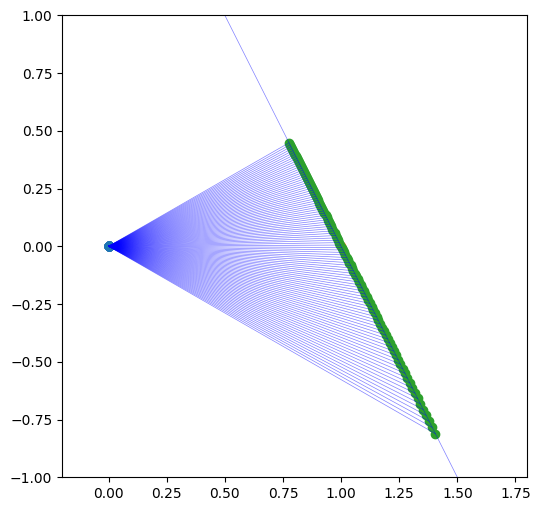

In [10]:
#### intersection ####
p1 = np.repeat(origin, N, axis=1)
v1 = np.repeat(v, N, axis=1)
t = intersect(p0=srcs, v0=rays, p1=p1, v1=v1)
int_points = p1 + np.einsum('j,ij->ij', t, v1) # this operation is not streight-forward using numpy. 
# You can loop though all the elements of both arrays and store the results in another array but einsum is cleaner. 
# learn more about einsum: https://numpy.org/doc/stable/reference/generated/numpy.einsum.html
######################

fig, ax = plt.subplots(figsize=[6, 6])
fig, ax = draw_lines(fig, ax, srcs, int_points-srcs, 1.0, False)
fig, ax = draw_lines(fig, ax, origin, v, 10.0, True)

ax.scatter(int_points[0], int_points[1])

ax.set_xlim(-0.2, 1.8)
ax.set_ylim(-1, 1)
plt.show()

In [13]:
# reflection
# finding angles -> angles between vectors
normal/=np.sqrt(np.sum(normal*normal))
n = np.repeat(normal, N, axis=1)

angles = np.pi - np.arccos(np.sum(rays*n, axis=0))


# The cross product between the two vectors determines the sign of the angles.
# both vectors are in the xy plane so their cross product only has a z component.
sign = np.sign(rays[0] * n[1] - rays[1] * n[0]) 
angles *= sign
print(angles*180/np.pi)

[-56.56505118 -55.95899057 -55.35292996 -54.74686936 -54.14080875
 -53.53474815 -52.92868754 -52.32262693 -51.71656633 -51.11050572
 -50.50444512 -49.89838451 -49.2923239  -48.6862633  -48.08020269
 -47.47414209 -46.86808148 -46.26202087 -45.65596027 -45.04989966
 -44.44383906 -43.83777845 -43.23171784 -42.62565724 -42.01959663
 -41.41353603 -40.80747542 -40.20141481 -39.59535421 -38.9892936
 -38.383233   -37.77717239 -37.17111178 -36.56505118 -35.95899057
 -35.35292996 -34.74686936 -34.14080875 -33.53474815 -32.92868754
 -32.32262693 -31.71656633 -31.11050572 -30.50444512 -29.89838451
 -29.2923239  -28.6862633  -28.08020269 -27.47414209 -26.86808148
 -26.26202087 -25.65596027 -25.04989966 -24.44383906 -23.83777845
 -23.23171784 -22.62565724 -22.01959663 -21.41353603 -20.80747542
 -20.20141481 -19.59535421 -18.9892936  -18.383233   -17.77717239
 -17.17111178 -16.56505118 -15.95899057 -15.35292996 -14.74686936
 -14.14080875 -13.53474815 -12.92868754 -12.32262693 -11.71656633
 -11.110505

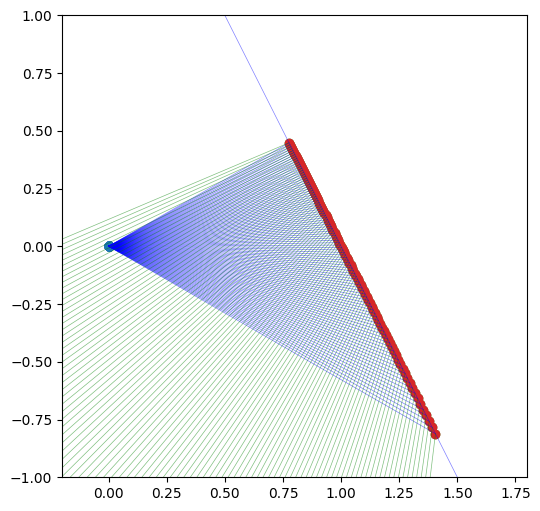

In [14]:
reflected = np.stack([n[0]*np.cos(angles) + n[1]*np.sin(angles), -n[0]*np.sin(angles) + n[1]*np.cos(angles)], axis=0)

# Note: there is a nice vector formula for the reflection vector which is out of the scope of this excercise. You can learn more here:
# https://math.stackexchange.com/questions/13261/how-to-get-a-reflection-vector
fig, ax = plt.subplots(figsize=[6, 6])
fig, ax = draw_lines(fig, ax, srcs, int_points-srcs, 1.0, False)
fig, ax = draw_lines(fig, ax, origin, v, 10.0, True)
fig, ax = draw_lines(fig, ax, int_points, reflected, 10.0, False, color='green')

ax.scatter(int_points[0], int_points[1])

ax.set_xlim(-0.2, 1.8)
ax.set_ylim(-1, 1)
plt.show()

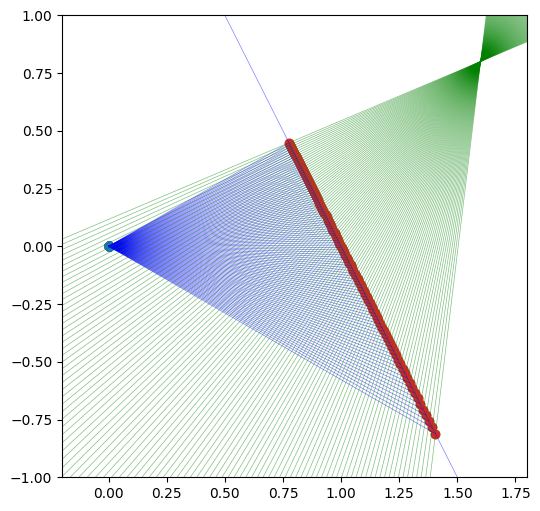

In [90]:
# Showing the image

fig, ax = plt.subplots(figsize=[6, 6])
fig, ax = draw_lines(fig, ax, srcs, int_points-srcs, 1.0, False)
fig, ax = draw_lines(fig, ax, origin, v, 10.0, True)
fig, ax = draw_lines(fig, ax, int_points, reflected, 10.0, True, color='green')

ax.scatter(int_points[0], int_points[1])

ax.set_xlim(-0.2, 1.8)
ax.set_ylim(-1, 1)
plt.show()